In [1]:
import os
from sklearn.model_selection import train_test_split
import shutil
from keras import regularizers
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.layers import Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [8]:
#-- Assign picture
source_folders = ['empty', 'walk']
output_folder = "wall_path2/output"  
os.makedirs(output_folder, exist_ok=True)

base_folder = 'wall_path2/dataset'   
train_set_folder = os.path.join(base_folder, 'training_set')
val_set_folder = os.path.join(base_folder, 'val_set')

os.makedirs(train_set_folder, exist_ok=True)
os.makedirs(val_set_folder, exist_ok=True)

for source_folder in source_folders:
    source_path = os.path.join(base_folder, source_folder)  
    image_files = os.listdir(source_path)

    train_images, val_images = train_test_split(image_files, train_size=90, test_size=30, random_state=42)

    for file in train_images:
        source_path = os.path.join(base_folder, source_folder, file)
        target_path = os.path.join(train_set_folder, source_folder, file)
        os.makedirs(os.path.dirname(target_path), exist_ok=True)
        shutil.copy(source_path, target_path)

    for file in val_images:
        source_path = os.path.join(base_folder, source_folder, file)
        target_path = os.path.join(val_set_folder, source_folder, file)
        os.makedirs(os.path.dirname(target_path), exist_ok=True)
        shutil.copy(source_path, target_path)


In [9]:
data_root = 'wall_path2/dataset'  
train_images = []
train_labels = []
val_images = []
val_labels = []
test_images = []
test_labels = []

classes = ['empty', 'walk']

for dataset_folder in ['training_set', 'val_set', 'test_set']:
    dataset_path = os.path.join(data_root, dataset_folder)
    
    for class_name in classes:
        class_path = os.path.join(dataset_path, class_name)
        images = []

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            if image_path.endswith((".jpg", ".jpeg", ".png")):
                image = cv2.imread(image_path)
                image = cv2.resize(image, (224, 224))  
                image = image / 255.0  
                images.append(image)
        
        if dataset_folder == 'training_set':
            train_images.extend(images)
            train_labels.extend([classes.index(class_name)] * len(images))
        elif dataset_folder == 'val_set':
            val_images.extend(images)
            val_labels.extend([classes.index(class_name)] * len(images))
        elif dataset_folder == 'test_set':
            test_images.extend(images)
            test_labels.extend([classes.index(class_name)] * len(images))

train_images = np.array(train_images)
train_labels = np.array(train_labels)
val_images = np.array(val_images)
val_labels = np.array(val_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)


In [10]:
# CNN model
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)))      
model.add(layers.MaxPooling2D((2, 2)))  
model.add(layers.Conv2D(32, (3, 3), activation='relu'))  
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu'))  
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten())
model.add(Dropout(0.5))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.03, l2=0.03)))  
model.add(layers.Dense(2, activation='softmax'))  

In [11]:
adam = Adam(learning_rate=0.0001) 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(train_images, train_labels, epochs=50,batch_size=32,validation_data=(val_images, val_labels))

Epoch 1/50
6/6 [==============================] - 6s 752ms/step - loss: 250.0742 - accuracy: 0.5278 - val_loss: 152.0297 - val_accuracy: 0.5000
Epoch 2/50
6/6 [==============================] - 4s 716ms/step - loss: 109.8422 - accuracy: 0.6056 - val_loss: 59.1125 - val_accuracy: 0.9333
Epoch 3/50
6/6 [==============================] - 4s 698ms/step - loss: 45.4901 - accuracy: 0.9111 - val_loss: 38.6145 - val_accuracy: 0.9333
Epoch 4/50
6/6 [==============================] - 4s 699ms/step - loss: 38.5680 - accuracy: 0.8889 - val_loss: 31.3733 - val_accuracy: 0.9833
Epoch 5/50
6/6 [==============================] - 4s 701ms/step - loss: 24.6495 - accuracy: 0.9944 - val_loss: 17.0648 - val_accuracy: 0.9667
Epoch 6/50
6/6 [==============================] - 4s 727ms/step - loss: 16.4076 - accuracy: 0.9889 - val_loss: 14.2627 - val_accuracy: 0.9667
Epoch 7/50
6/6 [==============================] - 4s 722ms/step - loss: 11.8649 - accuracy: 0.9889 - val_loss: 10.1751 - val_accuracy: 1.0000
Epo

In [13]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print("test_loss:", test_loss)
print("test_accuracy:", test_accuracy)

2/2 [==============================] - 0s 111ms/step - loss: 4.2758 - accuracy: 1.0000
test_loss: 4.275781154632568
test_accuracy: 1.0


2/2 - 0s - loss: 4.2758 - accuracy: 1.0000 - 236ms/epoch - 118ms/step


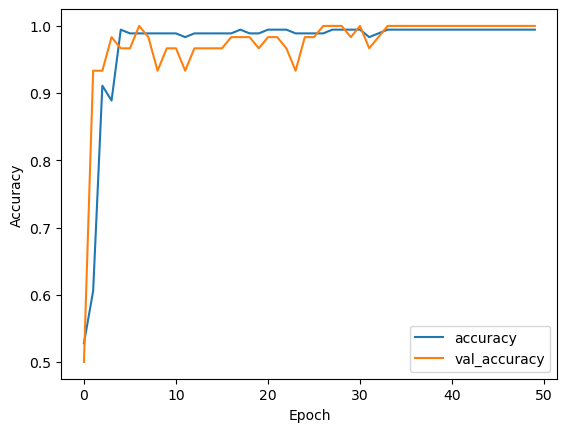

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


2/2 - 0s - loss: 4.2758 - accuracy: 1.0000 - 259ms/epoch - 129ms/step


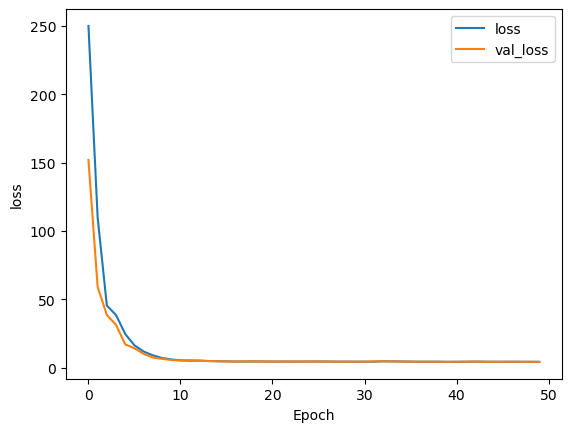

In [15]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

2/2 [==============================] - 0s 100ms/step
Confusion Matrix:
[[30  0]
 [ 0 30]]


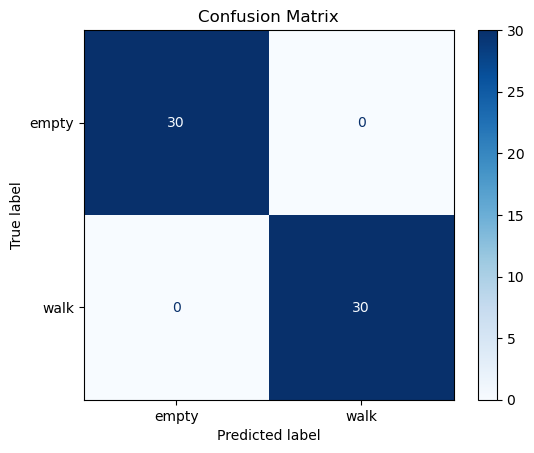


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [16]:
test_predictions = model.predict(test_images)
test_predictions = np.argmax(test_predictions, axis=1)  

cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix:")
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['empty', 'walk'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
report = classification_report(test_labels, test_predictions)
print("\nClassification Report:")
print(report)